<a href="https://colab.research.google.com/github/Nanase1994/BA810/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google Colab Notebook link:

# Homework 1 (Total 100 points)

#Homework 1

## Q1. Load and examine the `Auto.csv` dataset from the course folder on Google drive. **(10 points total)**

  1. Should you drop any variable from regression analysis and why? (5 points)
  1. Which variables should be treated as numeric and which as categorical? Explain why. (5 points)

Provide python code and analysis results first. Use them to support your answers to the two questions above.

FYI the column definitions (from https://cran.r-project.org/web/packages/ISLR/ISLR.pdf):
* mpg: miles per gallon (The outcome, or y, variable)
* cylinders: Number of cylinders between 4 and 8
* displacement: Engine displacement (cu. inches)
* horsepower: Engine horsepower
* weight: Vehicle weight (lbs.)
* acceleration: Time to accelerate from 0 to 60 mph (sec.)
* year: Model year (modulo 100)
* origin: Origin of car (1. American, 2. European, 3. Japanese)
* name: Vehicle name


In [1]:
import pandas as pd
auto_url = 'https://drive.google.com/uc?export=download&id=1IPJbXeI0I4R4aVx_lM4ozdCpfr-Ww1MA'
auto = pd.read_csv(auto_url)


print(auto.info(), "\n")

print(auto.head(), "\n")

auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto = auto.dropna(subset=['horsepower'])
missing_hp = auto['horsepower'].isna().sum()
print(missing_hp, "\n")

print(auto.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB
None 

    mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433  

## 1 Should you drop any variable from regression analysis and why?

Yes, the variable name should be dropped from the regression analysis.
This column only contains the car model names, which are text identifiers without any numerical or ordinal meaning.
Including it in a regression model would not contribute useful information and could create unnecessary complexity because each car name is unique.
Therefore, name should be excluded from the model.

## 2 Which variables should be treated as numeric and which as categorical? Explain why.

In this dataset, most variables are naturally numeric, while a few represent categories rather than continuous quantities. The variables mpg, displacement, horsepower, weight, acceleration, and year should be treated as numeric. These variables measure continuous characteristics such as fuel efficiency, engine size, power, vehicle weight, and acceleration time. The year variable, although technically an integer, reflects a time trend and can be treated as numeric to capture the continuous improvement in car technology over time.

In contrast, cylinders and origin should be treated as categorical variables. The number of cylinders takes only a few discrete values that represent distinct engine types, not a continuous scale. Similarly, origin is a coded categorical variable indicating the car’s manufacturing region. Finally, the variable name should be excluded from analysis because it is merely a textual identifier for each car model .

## Q2. Scatter and explore. **(20 points total)**
1. Plot all the pairwise scatter plots and histograms for the numeric features. (10 points)
1. Discuss two interesting relationships that you notice. (10 points)

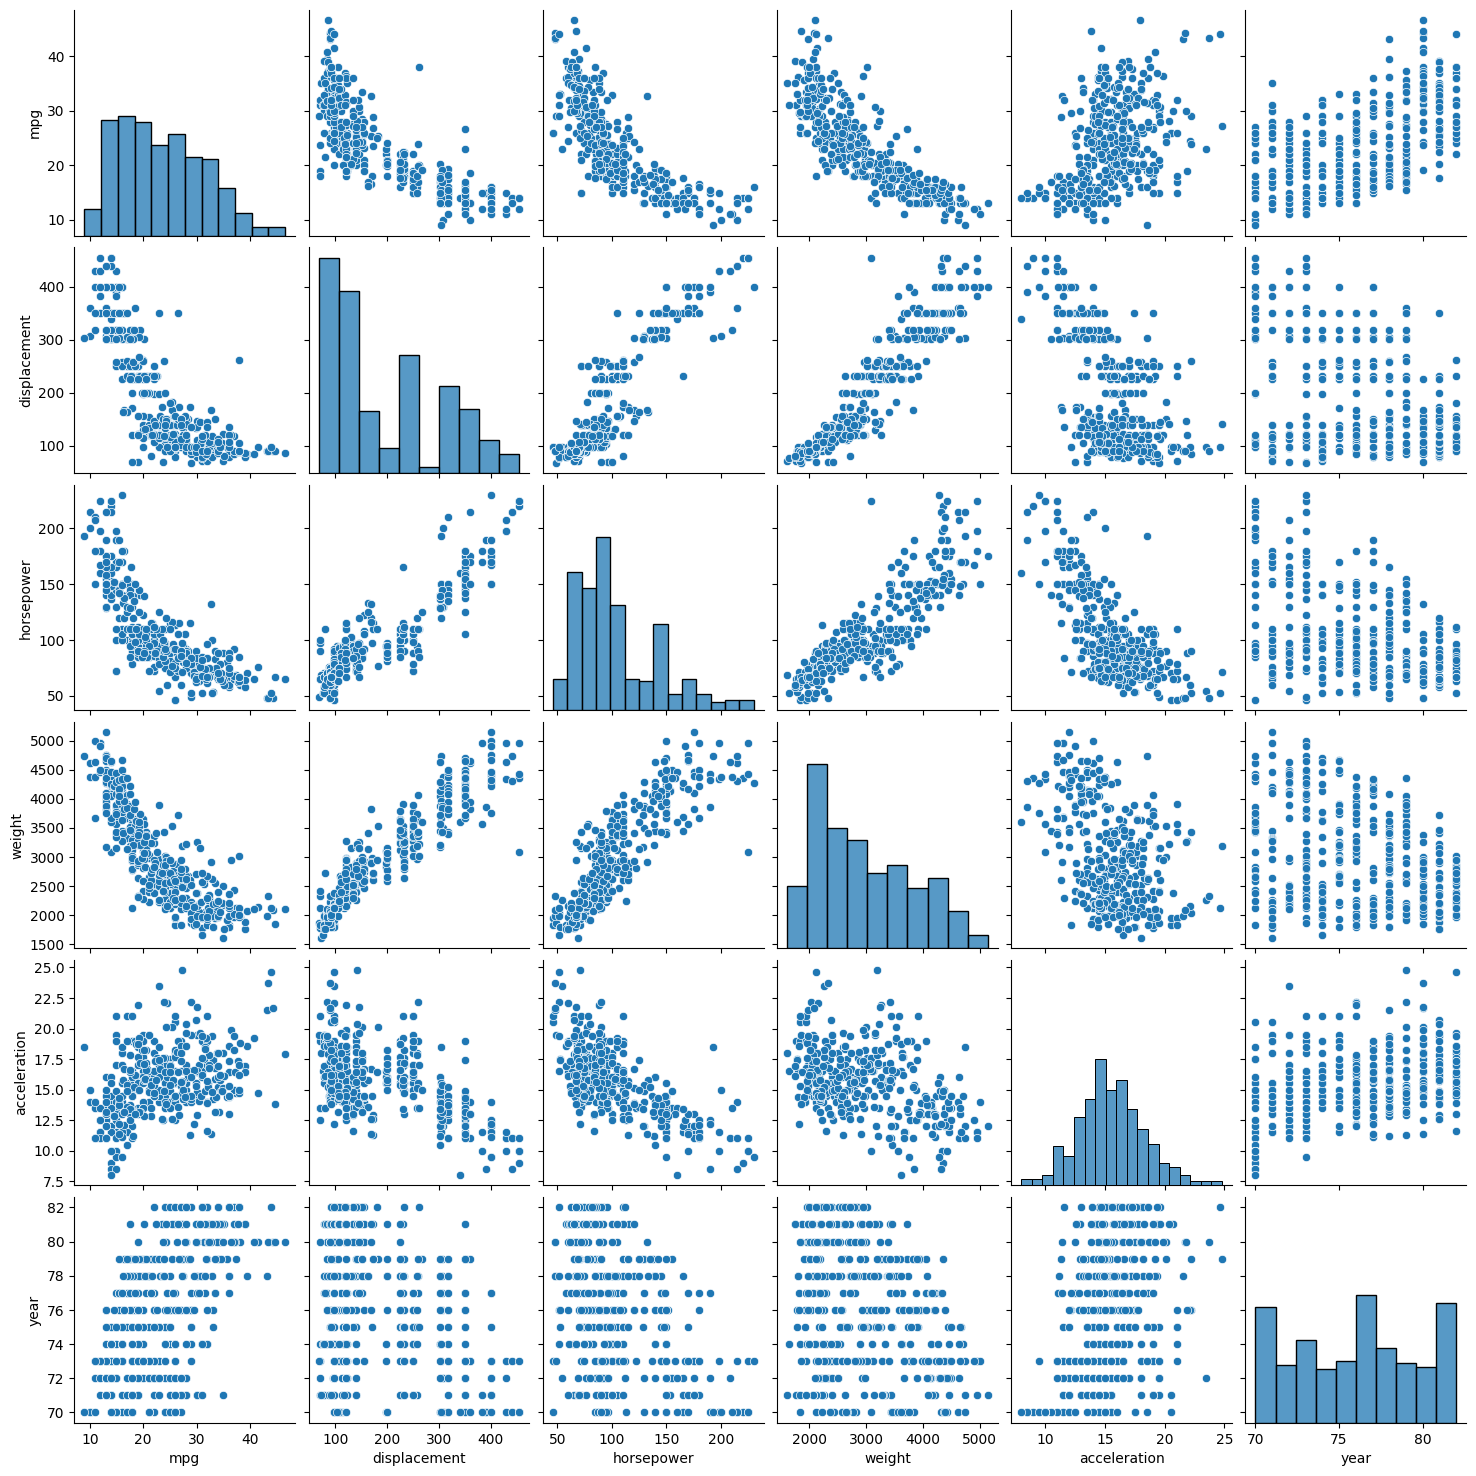

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_features = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
sns.pairplot(auto, vars = numeric_features)
plt.show()

## Discuss two interesting relationships that you notice.

MPG is positively correlated with model year: There is a clear upward trend between MPG and model year. Vehicles manufactured in later years have higher MPG, indicating that fuel efficiency has improved over time. This may reflect technological advances in the 1970s and 1980s, as well as people's growing awareness of environmental protection.

Weight is negatively correlated with MPG: MPG decreases sharply as weight increases, forming a clear downward trend. This indicates that heavier vehicles are less fuel efficient because more energy is required to move the greater mass, resulting in higher fuel consumption per mile. The data points are closely clustered around this downward line, indicating a strong correlation between the two variables.

## Q3. Compute the correlation matrix among the numeric variables. Discuss one interesting correlation. (10+10=**20 points total**)

In [2]:
numeric_cols = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']

corr_matrix = auto[numeric_cols].corr()
print("=== Correlation Matrix ===")
print(corr_matrix)

=== Correlation Matrix ===
                   mpg  displacement  horsepower    weight  acceleration  \
mpg           1.000000     -0.805127   -0.778427 -0.832244      0.423329   
displacement -0.805127      1.000000    0.897257  0.932994     -0.543800   
horsepower   -0.778427      0.897257    1.000000  0.864538     -0.689196   
weight       -0.832244      0.932994    0.864538  1.000000     -0.416839   
acceleration  0.423329     -0.543800   -0.689196 -0.416839      1.000000   
year          0.580541     -0.369855   -0.416361 -0.309120      0.290316   

                  year  
mpg           0.580541  
displacement -0.369855  
horsepower   -0.416361  
weight       -0.309120  
acceleration  0.290316  
year          1.000000  


## Discuss one interesting correlation.
Displacement vs. Weight (Correlation: +0.932994):
This is an extremely positive value, very close to 1.0. This number indicates that displacement and weight are almost perfectly correlated. This isn't simply because larger displacement engines are heavier, but rather a fundamental design relationship. Manufacturers typically install larger displacement engines in heavier vehicles and smaller displacement engines in lighter ones.

## Q4. Use `statsmodels` to regress mpg on all other variables. Note you can tell `ols()` to treat a variable as categorical by enclosing the variable in `C()`. **(15 points total)**
  1. Interpret the significant effects. (5 points)
  1. Which variables don't have a significant effect? Provide potential explanation for one surprising non-effect. (5 points)
  1. Discuss the difference in results when you treat `year` as a categorical vs a numeric variable. (5 points)

In [3]:
import statsmodels.formula.api as smf
# Model 1: year as numeric
model1 = smf.ols('mpg ~ C(cylinders) + displacement + horsepower + weight + acceleration + year + C(origin)', data=auto).fit()
print("Regression: year as numeric")
print(model1.summary())

Regression: year as numeric
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     191.1
Date:                Wed, 29 Oct 2025   Prob (F-statistic):          2.39e-147
Time:                        20:38:18   Log-Likelihood:                -993.35
No. Observations:                 392   AIC:                             2011.
Df Residuals:                     380   BIC:                             2058.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept 

In [4]:
# Model 2: year as categorical
model2 = smf.ols('mpg ~ C(cylinders) + displacement + horsepower + weight + acceleration + C(year) + C(origin)', data=auto).fit()
print("Regression: year as categorical")
print(model2.summary())

Regression: year as categorical
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 29 Oct 2025   Prob (F-statistic):          2.64e-151
Time:                        20:38:53   Log-Likelihood:                -954.59
No. Observations:                 392   AIC:                             1955.
Df Residuals:                     369   BIC:                             2047.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Interc

###Year as Numeric

Key significant variables are:
Weight (p = 0.000): Each additional pound of vehicle weight reduces mpg by about 0.0067. Heavier cars are consistently less fuel-efficient.
Year (p = 0.000):Newer model years show higher mpg, reflecting technological improvement over time.
Origin (p = 0.000): European and Japanese cars (categories 2 and 3) have 1.7–2.3 mpg higher fuel efficiency than American cars.
Horsepower (p = 0.009): Cars with more powerful engines consume more fuel per mile.
Cylinders (4, 5, 8) p < 0.05: The number of cylinders influences mpg; cars with fewer cylinders are more fuel-efficient.

Not significant:
C(cylinders)[T.6] (p = 0.067) and acceleration (p = 0.78) show high p-values (> 0.05), indicating no statistically significant independent effect once weight and year are included.

A interesting correlation:
Acceleration (p = 0.78)
Based on some stereotypes, one might assume that faster acceleration reduces fuel efficiency. However, acceleration performance depends on engine power and vehicle weight.
After controlling for these two factors, acceleration performance no longer has additional explanatory power.
Furthermore, manufacturers may tune their vehicles differently, so the same acceleration performance may result in different fuel consumption patterns.


###Year as Categorical

Key significant variables are:


Weight (p = 0.000): Still the dominant negative predictor.


Origin (p = 0.001): Remain significant positive effects.


Later Year 1976-1982  (p = 0.000): The later years are very significant. Compared to the baseline (1970), there was no significant change from 1971-1975. However, starting in 1976 and especially in later years like 1980, cars had drastically higher MPG.


C(origin)[T.3] (p = 0.001): This is the significant intercept shift for Japanese cars (origin 3) compared to USA cars.

horsepower (p=0.002)


Not significant:

Cylinders, horsepower, and acceleration remain insignificant, consistent with Year as Numeric Model.

displacement (p = 0.165), acceleration (p = 0.992), The early C(year) levels (1971-1976)


A interesting correlation:


The most surprising non-effect is displacement (p = 0.165). We know from our correlation analysis (and basic intuition) that displacement (engine size) has a strong negative relationship with mpg.

Treating year as a numerical variable implies a linear and steady improvement in fuel efficiency over time, which is a simple and easy approach to understand.

Treating year as a categorical variable allows for year-specific bias, but at the expense of introducing many additional coefficients.

Thus, treating the year data as categorical is much better.
It provides a better fit. The adjusted R-squared value is higher (0.847 vs. 0.874), meaning that the categorical model explains more variance in mpg.

## Q5. From the above regression model in Q4, include interactions between a numeric and categorical variable in three different regression models (three separate models in total). Do any of them appear significant? Discuss the results. **(15 points total)**


In [38]:
model1 = smf.ols('mpg ~ weight * C(origin) + displacement + horsepower + acceleration + year', data=auto).fit()
print("Interaction Model 1: weight × origin")
print(model1.summary())

Interaction Model 1: weight × origin
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     211.9
Date:                Wed, 29 Oct 2025   Prob (F-statistic):          1.40e-142
Time:                        08:21:36   Log-Likelihood:                -1010.3
No. Observations:                 392   AIC:                             2041.
Df Residuals:                     382   BIC:                             2080.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [36]:
model2 = smf.ols('mpg ~ horsepower * C(origin) + weight + displacement + acceleration + year', data=auto).fit()
print("Interaction Model 2: horsepower × origin")
print(model2.summary())

Interaction Model 2: horsepower × origin
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     240.7
Date:                Wed, 29 Oct 2025   Prob (F-statistic):          1.86e-151
Time:                        08:21:12   Log-Likelihood:                -989.23
No. Observations:                 392   AIC:                             1998.
Df Residuals:                     382   BIC:                             2038.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [37]:
model3 = smf.ols('mpg ~ year * C(origin) + weight + horsepower + displacement + acceleration', data=auto).fit()
print("Interaction Model 3: year × origin")
print(model3.summary())

Interaction Model 3: year × origin
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     208.6
Date:                Wed, 29 Oct 2025   Prob (F-statistic):          1.63e-141
Time:                        08:21:24   Log-Likelihood:                -1012.8
No. Observations:                 392   AIC:                             2046.
Df Residuals:                     382   BIC:                             2085.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

###Model 1: Interaction Between Weight and Origin
R-squared: 0.833
Significant interaction terms:
weight × C(origin)[T.2]: p = 0.009
weight × C(origin)[T.3]: p = 0.000
Both interaction terms are significant. The results indicate that while heavier vehicles generally have higher fuel consumption, Japanese and European vehicles experience a smaller fuel efficiency loss due to increased weight compared to American vehicles.

###Model 2: Interaction Between Horsepower and Origin
R-squared: 0.850
Significant interaction terms:
horsepower × C(origin)[T.2]: p < 0.001
horsepower × C(origin)[T.3]: p < 0.001
Both interaction terms are highly significant. The negative coefficients indicate that the relationship between horsepower and fuel consumption is weaker for imported vehicles. Increased horsepower significantly reduces fuel consumption for American vehicles than for European or Japanese vehicles.

###Model 3: Interaction Between Year and Origin
R-squared: 0.831
Significant interaction terms:
year × C(origin)[T.2]: p = 0.000
year × C(origin)[T.3]: p = 0.004
Both interaction terms are significant. The positive coefficients indicate that the MPG of foreign vehicles is improving faster than that of American vehicles. This suggests that in the 1970s and early 1980s, foreign automakers adopted more fuel-efficient technologies earlier and improved them more rapidly.

###The interaction terms involving origin are statistically significant in all three models.
This means that the effects of weight, horsepower, and year on fuel efficiency depend on the vehicle's origin.
Overall, Japanese and European vehicles are less negatively affected by weight and horsepower and experience greater annual fuel economy improvements, highlighting regional differences in vehicle design and technology.

## Q6. Measure the in-sample and out of sample $R^2$ of the model specified in Q4.1 using 80% data for training and 20% data for testing. **(10 points total)**

If you run into a problem because some values of a categorical column are missing in the training set, check the parameter `handle_unknown` for the OneHotEncoding class.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

train, test = train_test_split(auto, test_size=0.2, random_state=42)

model_train = smf.ols('mpg ~ C(cylinders) + displacement + horsepower + weight + acceleration + year + C(origin)', data=train).fit()

r2_in = model_train.rsquared

pred_test = model_train.predict(test)

r2_out = r2_score(test['mpg'], pred_test)

print(f"In-sample R²:  {r2_in:.3f}")
print(f"Out-of-sample R²: {r2_out:.3f}")

In-sample R²:  0.848
Out-of-sample R²: 0.833


The model used was: mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin)

After fitting the model on the training data and predicting mpg on the testing data, the R-squared:
In-sample R²:  0.848
Out-of-sample R²: 0.833

They are very close to each other, which indicates that the model generalizes well to unseen data and is not overfitting.

## Q7. Collaboration statement **(10 points total)**
Who did you discuss while answering this homework (whether to get or to provide help)? What questions/topics did you discuss? Did you use any generative AI tool, such as ChatGPT? If so, provide your prompts.

Note: No penalty for either side. While getting help in figuring out how to solve is OK, all answers should be produced by you.

If you did not collaborate with anyone simply declare so.

Sample answer:

1. I discussed with Hazel for this homework. I needed her help with submission system and as a sounding board for the reasonableness of this homework.
2. I used ChatGPT with the following prompt to understand how to measure out of sample $R^2$:
> provide prompt here

Then I wrote the code that is submitted in the assignment.

3. I did not discuss with anyone or get any help from any generative AI tool.

1. I did not discuss this homework with anyone.
2. I used ChatGPT as a learning aid to better understand the statistical interpretation of regression analysis in Python. Example:
I am not very clear about this concept, please explain it to me.
“Measure the out of sample  𝑅2.”

## Submit
1. Submit your colab notebook as a pdf file. Use the code in [this notebook](https://colab.research.google.com/drive/1ZZLCXbvUS3DEpZt9fgVVhZxWMxNigu2a?usp=sharing) to convert your notebook to professional looking pdf. Do review the pdf file to make sure everything is appearing correctly before submitting!
1. Include a link to the colab notebook in your submission and make sure to provide us (TAs and professor) access to view it.


Link: https://colab.research.google.com/drive/1zxV0pDWVXeI-4FzQ_JQiXqkIiyfl3pfF?usp=sharing